<h1> <p style="text-align: center;"> Исследование объявлений о продаже квартир </p> </h1>
<h3> Содержание </h3>
<div class="toc"> <ol class="toc-item">
    <li> Изучение данных из файла </li>
    <li> Предобработка данных </li>
    <li> Расчёты и добавление результатов в таблицу </li>
    <li> Исследовательский анализ данных </li>
    <li> Общий вывод </li>
</ol> </div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adv = pd.read_csv('', sep='\t') # в '' пишем наименование файла с данными
adv.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Предобработка данных

In [3]:
adv.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
adv.duplicated().sum()

0

Внимательно изучаем данные, полученные с помощью функций info(), describe().
Видим, что в данных довольно много колонок с пропущенными значениями, которые требуют обработки (например, высота потолков, количество балконов особенно бросаются в глаза, так как более половины данных по этим параметрам отсутствуют, хотя эти данные заполняются пользователями при размещении объявления). Также много пропусков в данных, которые получены автоматически на основе картографических данных (расстояния от центра, а/э и т.п.)

Помимо пропущенных значений, имеет смысл внимательно изучить данные в колонках ceiling_height, rooms, floors_total, days_exposition. В ceiling_height смущают минимальное и максимальное значения(квартир с высотой потолков в 1 метр и 100 метров просто не бывает), в rooms и floors_total также смущают максимальные значения в 19 комнат и 60 этажей (самое высокое здание в СПб состоит из 37 этажей), скорее всего это так называемые "выбросы" или аномальные значения. В days_exposition - довольно большое отклонение от среднего и большой разброс от минимума до максимума (от 1 дня и до 4-х с лишним лет).

Для начала проверим данные на наличие явных дубликатов, таких нет.
Далее проанализируем данные из колонки ceiling_height. Построим гистограмму.
Из гистограммы видим, что бОльшая часть данных лежит в промежутке от 2 м до 3 м, также относительно много данных от 3 до 4 м, а после 5 метров данных практически нет.
Подсчитаем соотношение общего количества данных с относительно корректными значениями высоты потолков(от 2 до 4,5 метров) к общему количеству данных о высоте потолков, которыми мы располагаем, это почти 100% данных. Значит, значения ниже 2 метров и больше 4,5 метров можно откидывать, а пропуски можно заполнить медианными значениями среди относительно корректных данных.
Лучше взять медианные, а не средние значения, так как наши относительно корректные значения распределены довольно неравномерно, бОльшая часть данных всё-таки между 2 и 3 метрами.
На всякий случай, убедимся в том, что данные меньше 2 метров и больше 4,5 метров всё-таки "выбросы", постороим гистограммы, из них видим, что данные меньше 2 метров - единичные "всплески", а вот с данные больше 4,5 метров, можно было бы отправить на "доработку", есть ощущение, что пользователи указали в своих объявлениях высоту не в метрах, а в каких-то других единицах.

0.9968974076116933

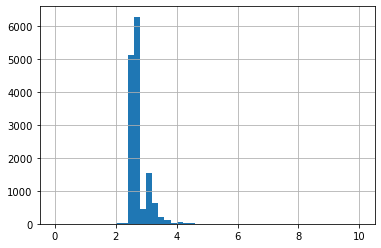

In [5]:
adv['ceiling_height'].hist(bins=50, range=(0,10))
adv.query('2 <= ceiling_height <= 4.5')['ceiling_height'].count()/14504

In [6]:
adv['ceiling_height'] = (
    adv['ceiling_height'].fillna(adv.query('2<=ceiling_height<=4.5')['ceiling_height'].mean())
)

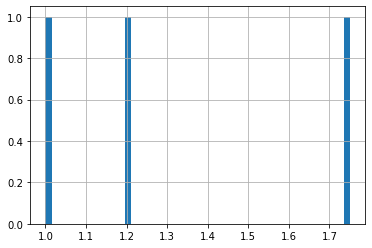

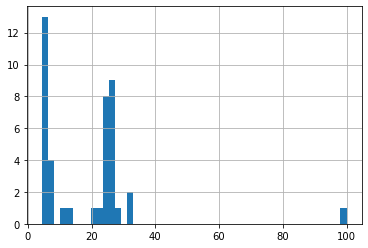

In [7]:
adv.query('ceiling_height < 2')['ceiling_height'].hist(bins=50)
plt.show()
adv.query('ceiling_height > 4.5')['ceiling_height'].hist(bins=50, range=(4.5,100))
plt.show()

Далее уберём пропуски из колонок floors_total, locality_name, is_apartment, kitchen_area, living_area, balcony. 

Узнать этажность домов у нас вряд ли получится, для этого нужны более точные локации объектов недвижимости, поэтому заменим отсутвующие данные на unknown, аналогичным образом поступим с колонкой locality_name. 

Данные в колонках kitchen_area, living_area попробуем заполнить медианными значениями в соответствии с типом недвижимости (is_apartment, studio, open_plan). Как мы видим, в студиях и квартирах со свободной планировкой, площадь кухни вообще не указана, значит, будем считать, что там она равна нулю. Впрочем, для квартир-студий это нормально, а в квартирах со свободной планировкой, кухня может абсолютного любой площади и не поддаётся каким-либо прогнозируемым подсчётам.

Пропуски в колонке с балконами заменим нулём, логично предположить, что если пользователь ничего не указал в объявлении о балконе, то его просто нет.
Пропуски в колонке is_apartment заменим на False, всё-таки данный тип недвижимости встречается довольно нечасто в России ввиду особого статуса такого объекта недвижимости (относится к коммерческому типу с более высокими налоговыми и коммунальными платежами по сравнению с жилым имуществом).

In [8]:
adv = adv.dropna(subset=['locality_name'])
adv.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.724581,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.724581,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.724581,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [9]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
adv.loc[adv['studio'] == True, 'kitchen_area'] = adv.loc[adv['studio'] == True, 'kitchen_area'].fillna(0)

In [11]:
adv['balcony'] = adv['balcony'].fillna(0)
adv['is_apartment'] = adv['is_apartment'].fillna(False)

Отдельно остановимся на колонке days_exposition, попробуем заполнить пропуски в ней исходя из максимального времени размещения объявления, даты оформления объявления и последней даты в нашем наборе данных. Вероятно, что, если в данной колонке пропущены значения, объявление ещё оставалось открытым на момент сбора данных.
К самой ранней даты в наборе данных прибавим максимальное количество дней размещения объявления (согласно нашим данным) и вычтем дату размещения текущего объявления. Для корректной работы с колонкой first_day_exposition нам нужно преобразовать её в формат дата-время и округлить до дней.

#Пропуски в колонке days_exposition заполним медианными значениями, так как средние значения не совсем отражают действительную картину ввиду большого разброса данных.

Пропуски в колонках 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest' заполняем тем же значением 'unknown', так как эти данные восстановить из уже имеющихся не представляется возможным.

In [12]:
adv[['parks_around3000','ponds_around3000']] = adv[['parks_around3000','ponds_around3000']].fillna(0)

In [13]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21530 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Приводим данные к нужным типам: приведём данные в колонке balcony  - к целочисленным значениям, данные в колонках floors_total и days_exposition также приведём к числовому формату, данные в колонке first_day_exposition приведём к формату дата-время, чтобы они занимали меньше оперативной памяти и с ними можно было корректно работать.

In [14]:
adv['balcony'] = adv['balcony'].astype(int)
adv['is_apartment'] = adv['is_apartment'].astype(bool)
adv['floors_total'] = pd.to_numeric(adv['floors_total'], errors='coerce')
adv['days_exposition'] = pd.to_numeric(adv['days_exposition'], errors='coerce')
adv['first_day_exposition'] = pd.to_datetime(adv['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Данные обработаны, можно приступать к расчётам.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:
- цену квадратного метра(sqr_metres_cost)
- день недели(weekday), месяц (month) и год (year) публикации объявления
- этаж квартиры(floor_type) c вариантами — первый(first_floor), последний last_floor) и другой
- соотношение жилой и общей площади (living_area_part), а также отношение площади кухни к общей (kitchen_area_part)

In [15]:
adv['sqr_metres_cost'] = adv['total_area']/adv['last_price']

adv['weekday'] = adv['first_day_exposition'].dt.weekday
adv['month'] = adv['first_day_exposition'].dt.month
adv['year'] = adv['first_day_exposition'].dt.year

In [16]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor==1:
        return 'first_floor'
    elif floor==floors_total and floors_total>1:
        return 'last_floor'
    else:
        return 'другой'

adv['floor_type'] = adv.apply(floor_type, axis=1)

In [17]:
adv['living_area_part'] = adv['living_area']/adv['total_area']
adv['kitchen_area_part'] = adv['kitchen_area']/adv['total_area']

In [18]:
adv.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'sqr_metres_cost', 'weekday',
       'month', 'year', 'floor_type', 'living_area_part', 'kitchen_area_part'],
      dtype='object')

## Исследовательский анализ данных

Изучаем такие параметры, как площадь, цена, число комнат, высота потолков, строим гистограммы для каждого параметра.
Для более наглядной картинки ограничим значения для построения графиков, отбросим самые максимальные и минимальные значения.

In [19]:
# задаём функцию для построения гистограмм
def hist_param(data, column, bins, ranges = None):
    data[column].hist(bins = bins, range = ranges)
    plt.title(column)
    plt.show()

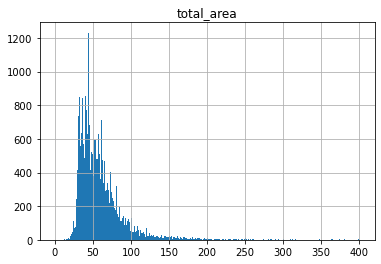

In [20]:
# строим гистограмму распределения квартир по параметру общей площади
hist_param(data = adv, column = 'total_area', bins = 300 , ranges = (0,400))

'Цены от 0 до 70 млн.'

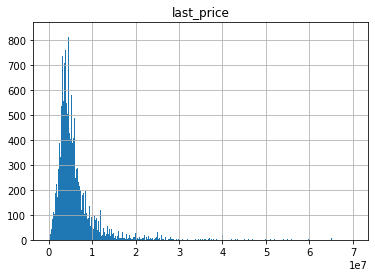

'Цены от 0 до 10 млн.'

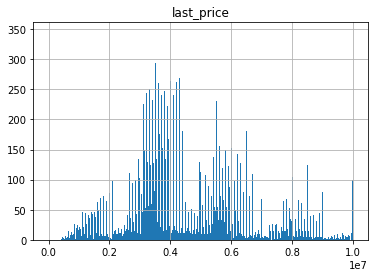

'Цены от 10 до 70 млн.'

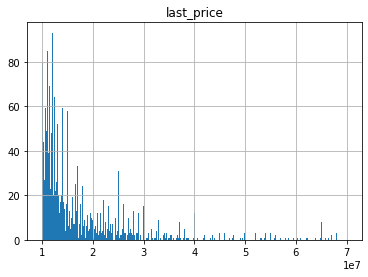

In [21]:
# строим гистограммы распределения квартир по параметру цены
display('Цены от 0 до 70 млн.')
hist_param(data = adv, column = 'last_price', bins = 500 , ranges = (0,70000000)) # цены от нуля до 70 млн.
display('Цены от 0 до 10 млн.')
hist_param(data = adv, column = 'last_price', bins = 500 , ranges = (0,10000000)) # цены от нуля до 10 млн.
display('Цены от 10 до 70 млн.')
hist_param(data = adv, column = 'last_price', bins = 500 , ranges = (10000000,70000000)) # цены от 10 до 70 млн.

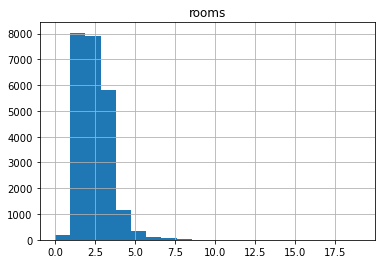

In [22]:
# распределение квартир по количеству комнат
hist_param(data = adv, column = 'rooms', bins = 20)

'Все квартиры'

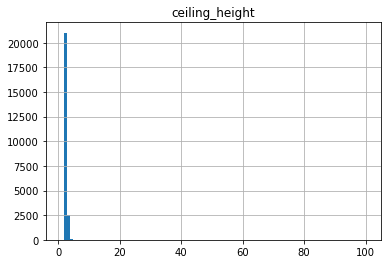

'Квартиры с высотой потолков от 1,5 до 10 метров'

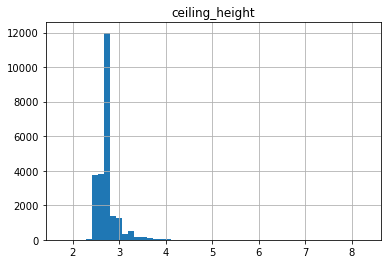

In [23]:
# распределение квартир по высоте потолков
display('Все квартиры')
hist_param(data = adv, column = 'ceiling_height', bins = 100) 
display('Квартиры с высотой потолков от 1,5 до 10 метров')
hist_param(data = adv.query('1.5<=ceiling_height<=10'), column = 'ceiling_height', bins = 50) 

Из гистограмм видим, что бОльшая часть объектов недвижимости имеет площадь от 25 до 200 кв. метров, ориентировочная стоимость большинства объектов в переделах от 1 до 40 млн. руб., комнат - 1-5, высота потолков - 2,5-4 метра.

Изучим время продажи квартиры, построим гистограмму, посчитаем среднее и медиану. Для гистограммы увеличим количество корзин до 100 для бОльшей детальности, медиану и среднее рассчитаем с помощью функции describe().

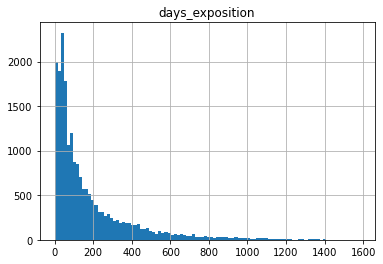

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [24]:
hist_param(data = adv, column = 'days_exposition', bins = 100) 
adv['days_exposition'].describe()

Итак, среднее время продажи квартиры составляет чуть больше 180 дней, медианное - 95 дней, гистограмма подтверждает эти данные довольно наглядно, на увеличение среднего повлияли выборы в виде долго продающихся квартир в 1580 дней, по гистограмме мы видим, что после 800 дней квартир в продаже очень-очень мало, а после 1400 дней - гистограмма "ползёт" совсем в сторону нуля.
Получается, что обычно продажа квартиры занимает чуть больше 3-х месяцев (95 дней). Можно считать, что продажи прошли очень быстро, когда они осуществились меньше, чем за месяц, хотя и такие случаи, судя по графику довольно часто встречаются, необычно долгие продажи - после 200 дней (больше полугода).

Попробуем убрать редкие и выбивающиеся значения. Из гистограммы сделали вывод, что количество дней продажи больше 800 дней встречается крайне редко, а дальше вообще стремится к нулю.
Попробуем построить разные графики зависимости долгих периодов продаж от года размещения объявления, цены за квадратный метр и удалённости квартиры от центра города.

In [25]:
slow_sale = adv.query('days_exposition > 800')

def plot_param(column):
    slow_sale.plot(x = column, y = 'days_exposition', style='o', grid=True, figsize=(12,5))
    plt.title(column)
    plt.show()

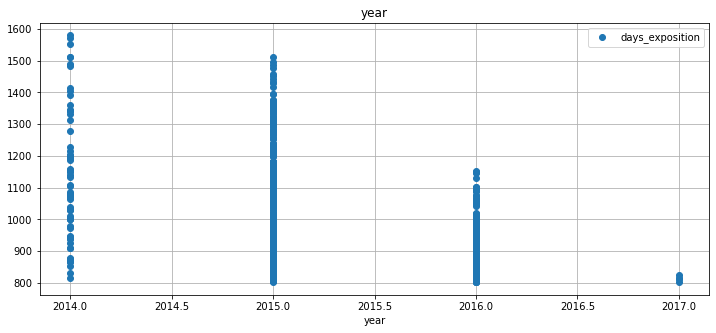

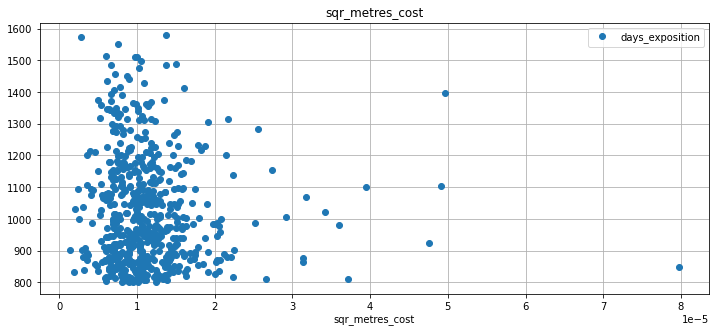

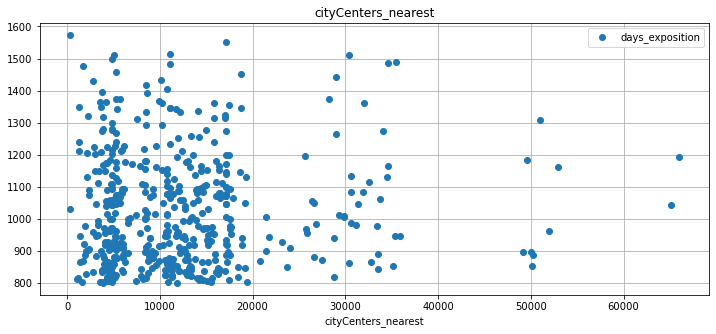

In [26]:
plot_param(column = 'year')
plot_param(column = 'sqr_metres_cost')
plot_param(column = 'cityCenters_nearest')

Оказалось, на длительность продаж отчасти может влиять цена квадратного метра, на графике видно, что бОльшая часть квартир сосредоточена в нижнем левом углу, где наименьшая цена и менее длительные продажи. Удалённость квартиры от центра не так сильно влияет на скорость продаж, но тенденция к сосредоточению бОльшей части квартир в левом нижнем углу также сохраняется, тут расположены квартиры поближе к центру и с менее долгим сроком продаж. Что касается года публикации объявления, то тут сложно сделать какие-то выводы, так как для квартир, выставленных на продажу в 2017 году максимальный срок продажи может составлять 1095 дней, для квартир 2016 года - 1460 дней и т.д., единственное, на что можно обратить внимание в этом графике - плотность более длительных продаж в 2015-16 годах, в сравнении, например, с плотность более длительных продаж в 2014 году.

In [27]:
def hist_year(year):
    adv[adv['year'] == year]['days_exposition'].hist(bins=50)
    plt.title(year)
    plt.show()

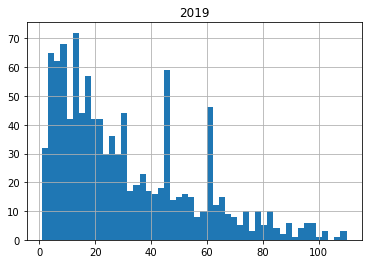

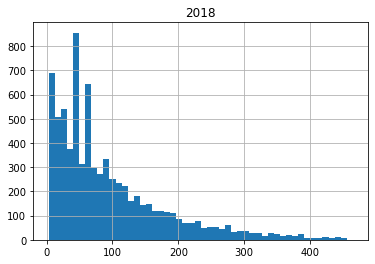

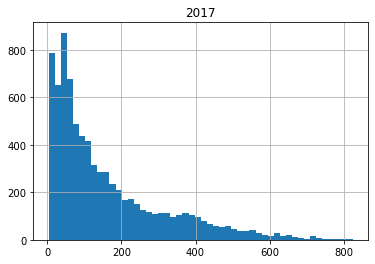

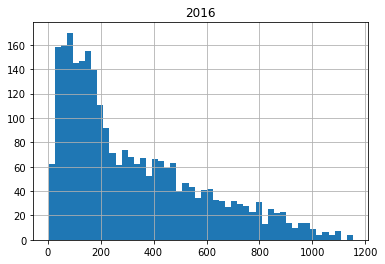

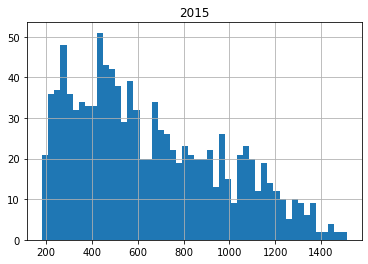

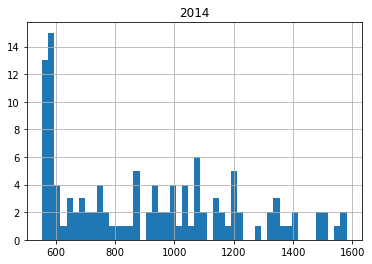

In [28]:
hist_year(2019)
hist_year(2018)
hist_year(2017)
hist_year(2016)
hist_year(2015)
hist_year(2014)

На гистогарммах скорости продаж по каждому году отдельно, видим, что максиммальное количество квартир в 2018-2016 годах продаётся в течение первых 200 дней, ну, и плотность продаж квартир 2015 года гораздо выше, чем в другие годы.

Давайте посмотрим, как обстоят дела с очень быстрыми продажами.
Метод describe() сообщил нам, что менее 25% квартир из общего пула объявлений продавались 45 и дней и меньше.
Построим график зависимости скорости быстрой продажи квартир от года публикации объявления.

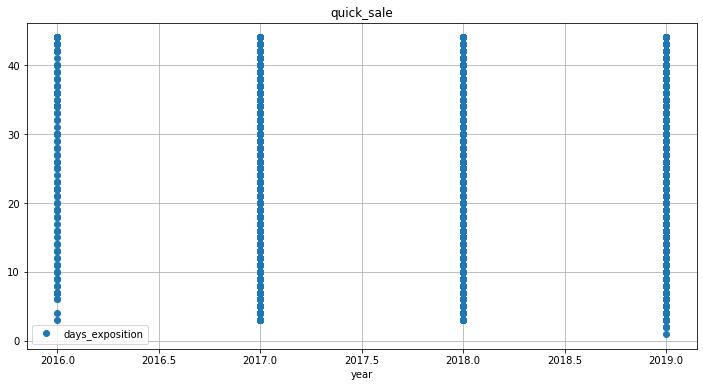

In [29]:
quick_sale = adv.query('days_exposition < 45')
quick_sale.plot(x='year', y='days_exposition', style='o', grid=True, figsize=(12,6))
plt.title('quick_sale')
plt.show()

Попробуем построить гистограммы скорости продажи квартир объявления по всем данным, а также исключив крайние значения (меньше 45 дней и больше 800 дней), чтобы проверить, насколько крайние значения повлияют на вид гистограммы.

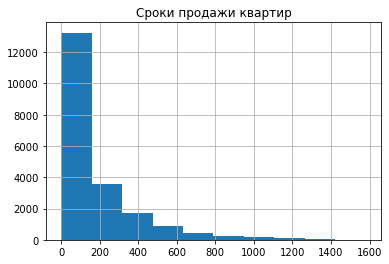

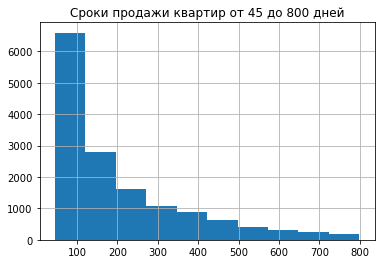

In [30]:
adv['days_exposition'].hist()
plt.title('Сроки продажи квартир')
plt.show()
adv.query('45<days_exposition<800')['days_exposition'].hist()
plt.title('Сроки продажи квартир от 45 до 800 дней')
plt.show()

Гистограммы внешне получились похожими, а, значит, можно исключить из дальнешей обработки данные покрайним показателям (слишком быстрые и слишком медленные продажи).
Также попробуем построить графики зависимости скорости продаж от года публикации объявления уже с исключёнными значениями.

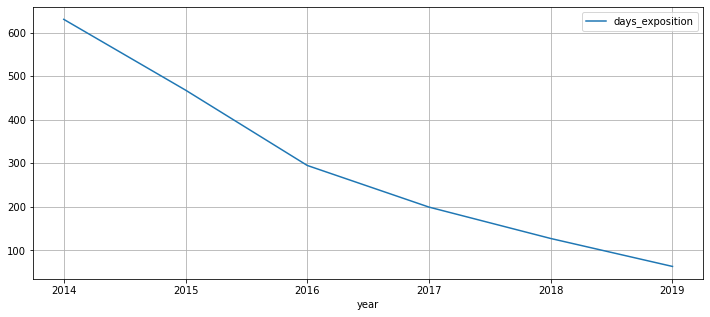

In [31]:
(
    adv.query('45<days_exposition<800')
    .pivot_table(index='year', values='days_exposition')
    .plot(grid=True, figsize=(12,5))
)
plt.show()

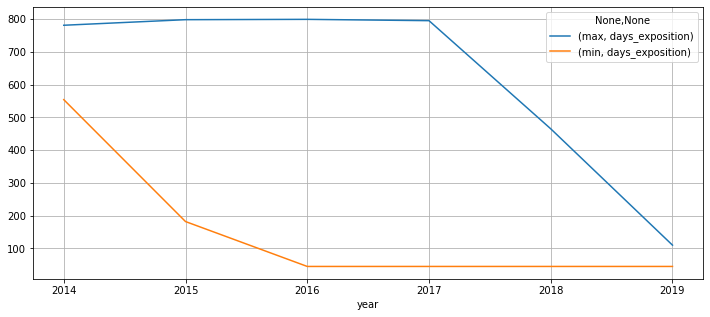

In [32]:
(
    adv.query('45<days_exposition<800')
    .pivot_table(index='year', values='days_exposition', aggfunc=['max', 'min'])
    .plot(grid=True, figsize=(12,5))
)
plt.show()

Обнаруживаем, что с 2017 года максимально возможный срок продажи резко снижается, а минимальный срок продажи остаётся на одном и том же уровне с 2016 года. 

Изучим, какие факторы больше всего влияют на стоимость квартиры.
Проверим, зависит ли цена от площади, числа комнат, удалённости от центра. Построим соответвующие графики.

0.773583968618132

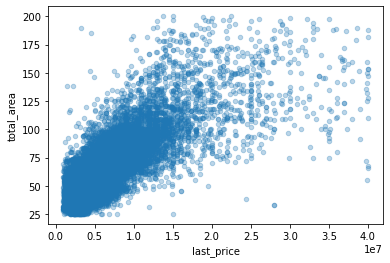

In [33]:
#площадь от 25 до 200 кв. метров & стоимость от 1 до 40 млн. руб.
(
    adv.query('25 <= total_area <= 200 and 1000000 <= last_price <= 40000000')
    .plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
)
(
    adv.query('25 <= total_area <= 200 and 1000000 <= last_price <= 40000000')['total_area']
    .corr(adv.query('25 <= total_area <= 200 and 1000000 <= last_price <= 40000000')['last_price'])
)

0.4752372152829091

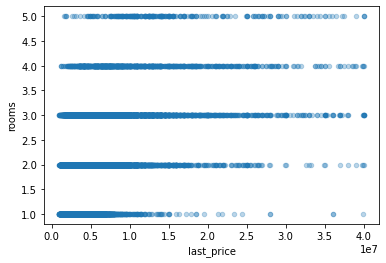

In [34]:
#стоимость от 1 до 40 млн. руб. & комнат - 1-5
(
    adv.query('1 <= rooms <= 5 and 1000000 <= last_price <= 40000000')
    .plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)
)
(
    adv.query('1 <= rooms <= 5 and 1000000 <= last_price <= 40000000')['last_price']
    .corr(adv.query('1 <= rooms <= 5 and 1000000 <= last_price <= 40000000')['rooms'])
)

-0.33823631583102837

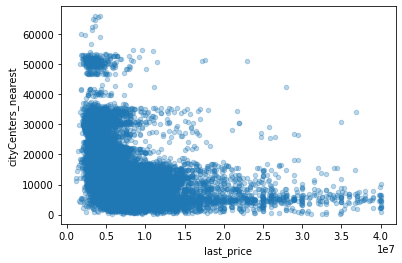

In [35]:
#стоимость от 1 до 40 млн. руб.
(
    adv.query('1000000 <= last_price <= 40000000')
    .plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3)
)
(
    adv.query('1000000 <= last_price <= 40000000')['last_price']
    .corr(adv.query('1000000 <= last_price <= 40000000')['cityCenters_nearest'])
)

В целом, графики показывают довольно ожидаемую картину: чем больше площадь квартиры, тем выше её цена, коэффициент корреляции в 0.77 говорит о наличии относительно сильной взаимосвязи между ценой и площадью квартиры. Также есть взаимосвязь между количеством комнат и ценой квартиры, увеличение количества комнат сопровождается увеличением цены квартиры, но так бывает не всегда, коэфицциент корреляции в 0.48 говорит о том, что связь между этими показателями не очень сильна.Что касается взаимосвязи таких параметров, как удалённость от центра и стоимость квартиры, то тут коэфициент корреляции отрицательный и взаимосвязь довольно слабая, выходит, что близость к центру может увеличивать стоимость квартиры, но это бывает далеко не всегда так, скорее, это даже далеко не самый ключевой фактор повышения цены. 

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

In [36]:
adv.pivot_table(index='floor_type', values='last_price', aggfunc=['median','mean'])

,median,mean
,last_price,last_price
floor_type,,
first_floor,3900000.0,4.800465e+06
last_floor,4300000.0,7.359138e+06
другой,4850000.0,6.675825e+06


Очевидно, что самые дешёвые квартиры продаются на первых этажах, самые дорогие - на средних этажах.


Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [37]:
# пишем функцию для построения графиков
def plot_days_exp(column, value):
    (
        adv.query('45 < days_exposition < 800 and 1000000 <= last_price <= 40000000')
        .pivot_table(index = column, values = value, aggfunc = ['mean','median'])
        .plot(grid=True, figsize=(12,5))
    )
    plt.legend(['mean_price', 'median_price'])
    plt.title(value + ' per ' + column)
    plt.show()

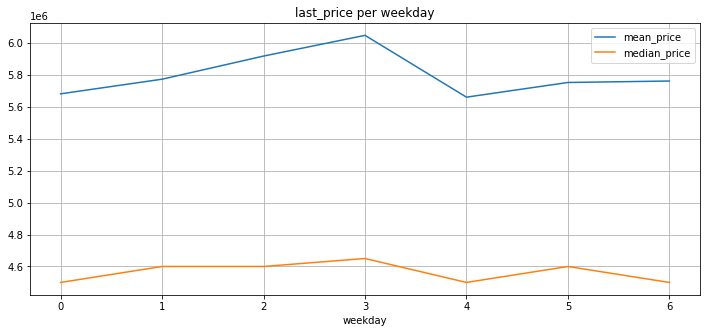

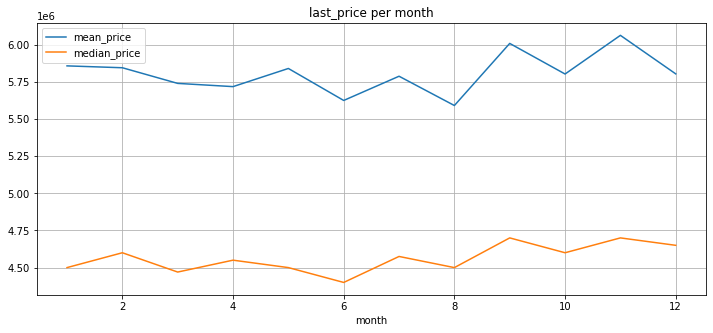

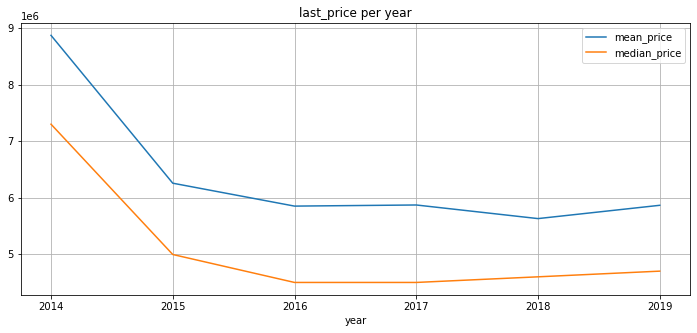

In [38]:
plot_days_exp(column = 'weekday', value = 'last_price')
plot_days_exp(column = 'month', value = 'last_price')
plot_days_exp(column = 'year', value = 'last_price')

Из графика зависимости цены от дня недели, когда размещено объявление, видим, что пик средней цены приходится на объявления, размещённые в четверг, минимум цены - на пятницу, а медианные значения цен по дню недели не имеют ярко выраженных пиков,поэтому говорить что-то определённое о зависимости цены от дня недели, когда было размещено объявление, вряд ли стоит.
По графику зависимости цены от месяца размещения объявления можем сделать вывод о том, что средняя цена растёт к концу года, медианная цена также имеет очень небольшую тенденцию к росту к концу года.
Согласно графику зависимости цены от года публикации объявления видим, что и средняя, и медианная цены сильно снижались с 2014 по 2016 годы, далее оставались примерно на одно и том же уровне до 2017, к 2018 году средняя цена снизилась ещё, медианная же, наоборот, немного выросла, а к 2019 году и медианная, и средняя цены стали расти, при этом медианная цена 2019 превысила медианную цену 2016, а средняя цена 2019 года сравнялась со средней ценой 2016 года. Скорее всего, падение цены после 2014 года было вызвано экономическим кризисом, а некоторый рост цен после 2018 - более льготными ставками ипотечного кредитования. 

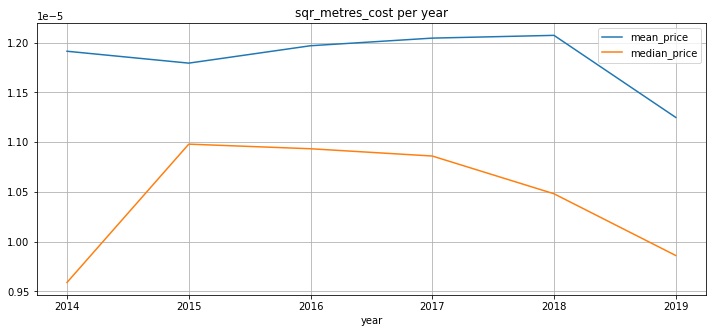

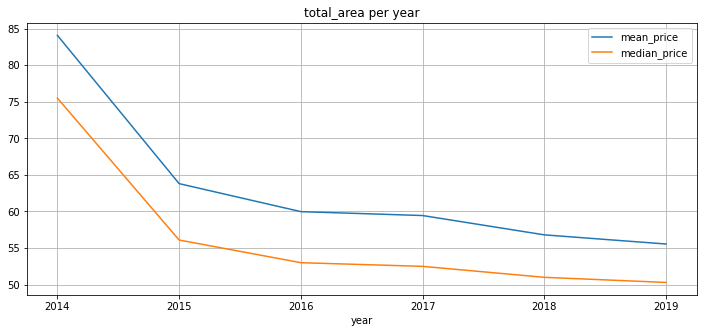

In [39]:
plot_days_exp(column = 'year', value = 'sqr_metres_cost')
plot_days_exp(column = 'year', value = 'total_area')

Выбираем 10 населённых пунктов с наибольшим числом объявлений и считаем среднюю цену квадратного метра в этих населённых пунктах. 

In [40]:
adv_locality = (
    adv.pivot_table(index = 'locality_name', values = 'sqr_metres_cost', aggfunc = ['count','mean'])
)
adv_locality.columns = ['adv_quantity', 'sqr_metres_cost_mean']
adv_locality.sort_values(by='adv_quantity', ascending=False).head(10)

,adv_quantity,sqr_metres_cost_mean
locality_name,,
Санкт-Петербург,15721,0.000010
посёлок Мурино,522,0.000012
посёлок Шушары,440,0.000013
Всеволожск,398,0.000015
Пушкин,369,0.000010
Колпино,338,0.000014
посёлок Парголово,327,0.000012
Гатчина,307,0.000016
деревня Кудрово,299,0.000011


Как ни странно, самая высокая стоимость квадратного метра не в СПб, а в Выборге, а самая низкая - в СПб и Пушкине.

Выделим населённые пункты с самой высокой и низкой стоимостью жилья из общих данных.

In [41]:
display(adv[adv['last_price'] == adv['last_price'].max()][['locality_name','last_price']])
adv[adv['last_price'] == adv['last_price'].min()][['locality_name','last_price']]

,locality_name,last_price
12971,Санкт-Петербург,763000000.0


,locality_name,last_price
8793,Санкт-Петербург,12190.0


Несмотря на то, что стоимость квадратного метра в СПб - самая низкая, и самый дорогой, и самый дешёвый объект недвижимости - именно в СПб.

Изучим предложения квартир по расстоянию до центра. Выделим квартиры в Санкт-Петербурге. Наша задача — выяснить, какая область входит в центр, создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график, который покажет, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона. График сильно меняется после отметки в 3 км приблизительно, получается, что в радиусе 3 км и есть центральная зона.

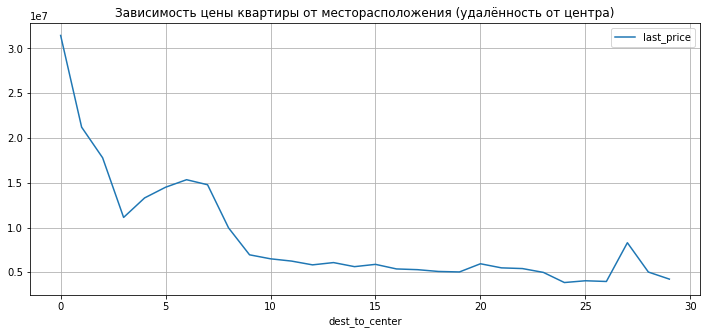

In [42]:
adv['dest_to_center'] = adv['cityCenters_nearest']/1000
adv['dest_to_center'] = round(adv['dest_to_center'])
(
    adv.query('locality_name=="Санкт-Петербург"')
    .pivot_table(index=['dest_to_center'], values='last_price')
    .plot(grid=True, figsize=(12,5))
)
plt.title('Зависимость цены квартиры от месторасположения (удалённость от центра)')
plt.show()

In [43]:
adv_center = adv.query('dest_to_center<3 and locality_name=="Санкт-Петербург"')
adv_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sqr_metres_cost,weekday,month,year,floor_type,living_area_part,kitchen_area_part,dest_to_center
24,8,6500000.0,97.2,2015-10-31,2,2.724581,3.0,46.5,1,False,...,124.0,265.0,0.000015,5,10,2015,first_floor,0.478395,0.201646,2.0
155,8,96000000.0,317.0,2017-07-07,4,3.500000,3.0,183.0,3,False,...,366.0,62.0,0.000003,4,7,2017,last_floor,0.577287,NaN,2.0
207,11,9000000.0,72.6,2018-09-08,2,2.900000,5.0,43.2,4,False,...,485.0,NaN,0.000008,5,9,2018,другой,0.595041,0.157025,2.0
213,11,8700000.0,111.4,2016-10-10,4,3.100000,4.0,73.2,2,False,...,55.0,791.0,0.000013,0,10,2016,другой,0.657092,0.126571,1.0
226,17,7950000.0,86.4,2019-04-24,4,2.724581,3.0,52.7,1,False,...,NaN,NaN,0.000011,2,4,2019,first_floor,0.609954,0.146991,2.0


Выделим сегмент квартир в центре (в радиусе 3 км), проанализируем эту территорию и изучиv следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

'Квартиры в центре, основные параметрывернёмся'

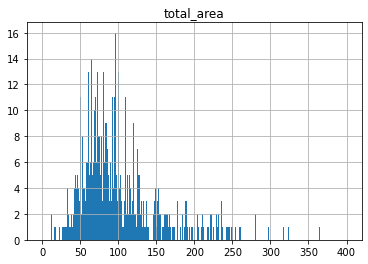

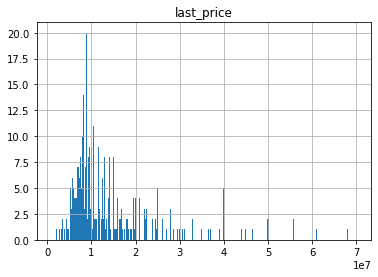

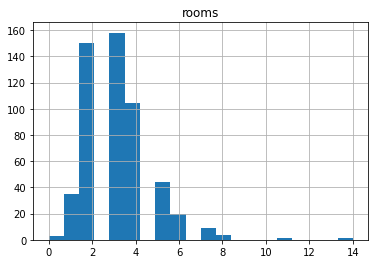

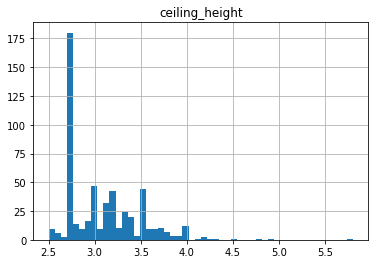

In [44]:
display('Квартиры в центре, основные параметрывернёмся')
hist_param(data = adv_center, column = 'total_area', bins = 300, ranges = (0,400))
hist_param(data = adv_center, column = 'last_price', bins = 500, ranges = (1000000,70000000))
hist_param(data = adv_center, column = 'rooms', bins = 20)
hist_param(data = adv_center.query('1.5<=ceiling_height<=10'), column = 'ceiling_height', bins = 50)

In [45]:
def corr_price(column, text):
    (
        adv_center.query('1 <= rooms <= 5 and 1000000 <= last_price <= 40000000')
        .plot(x = 'last_price', y = column, kind='scatter', alpha=0.3)
    )
    plt.title('Корреляция между ценой и ' + text + ' для квартир в центре города')
    plt.show()
    display (
        adv_center.query('1 <= rooms <= 5 and 1000000 <= last_price <= 40000000')['last_price']
        .corr(adv_center.query('1 <= rooms <= 5 and 1000000 <= last_price <= 40000000')[column])
    )

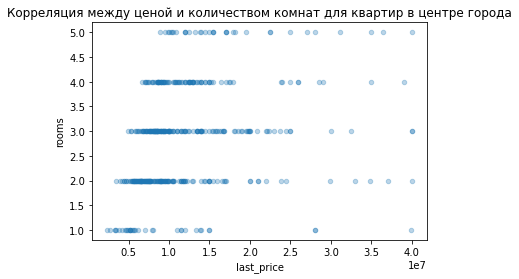

0.28189059491273494

In [46]:
corr_price(column = 'rooms', text = 'количеством комнат')

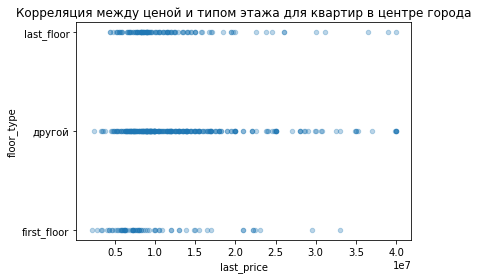

In [47]:
#стоимость от 1 до 40 млн. руб.
(
    adv_center.query('1000000 <= last_price <= 40000000')
    .plot(x='last_price', y='floor_type', kind='scatter', alpha=0.3)
)
plt.title('Корреляция между ценой и типом этажа для квартир в центре города')
plt.show()
    

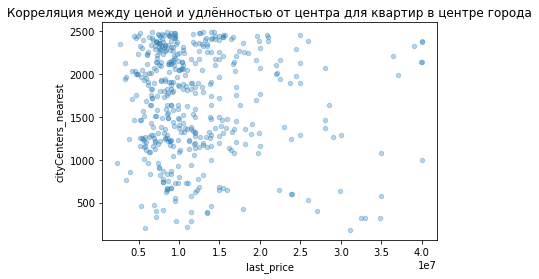

-0.060982840022006816

In [48]:
corr_price(column = 'cityCenters_nearest', text = 'удлённостью от центра')

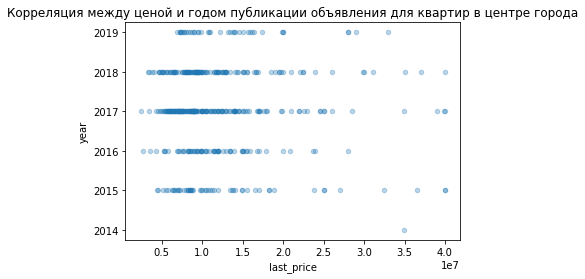

-0.019226898274322866

In [49]:
corr_price(column = 'year', text = 'годом публикации объявления')

По полученным гистограммам диаграммам рассеивания можно сделать следующие выводы:
- если из общей выборки бОльшая часть объектов недвижимости имела площадь от 30 до 70 кв. метров, то по квартирам в центре можо сделать вывод, что наиболее популярны квартиры с площадью более 80-100 кв. м
- в общей выборке диапазон стоимости большинства объектов начинался от 1 млн. руб., в центре города стоимость большинства объектов стартует с отметки в 5 млн.руб.
- в общей выборке популярны как студии, так и квартиры от 1 до 5 комнат, в центре студий очент мало, а однокомнатные встречаются даже реже пятикомнатных.
- высота потолков в центре также выше в среднем (2,75 метров - пик, а далее - 3 метра и выше у оставшегося большинства квартир), чем в общей выборке - где квартир с потолками больше 3 метров меньше относительно общей массы других квартир.
Скорее всего, данные различия объясняются тем, что в центре гораздо больше домов так называемого старого фонда (сталинки или даже дореволюционные дома,там и площади, и потолки, и количество комнат гораздо больше/ выше).

Что касается таких факторов влияния на цену, как число комнат, этаж и год размещения объявления, то, в целом, графики показывают довольно схожую на общую картину: чем больше число комнат, тем выше цена квартиры, на первом и последнем этажах - квратиры дешевле, чем на других, в 2015-16 гг цены на квартиры выше, чем в 2017-18 гг, в 2019 году цены вновь растут. Единственное отличие можно обнаружить в том, что для квартир в центре (в радиусе до 3 км) уже не сказывается особенно на цене бОльшая или меньшая близость к центру, так как удалённость от центра сказывается на цене квартир из общей выборки.

## Общий вывод

В ходе анализа архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, предоставленного сервисом Яндекс Практикум, нам удалось научиться определять рыночную стоимость объектов недвижимости,выявить и установить параметры для её определения. На цену прямопропорционально влияют такие факторы, как площадь квартиры, её близость к центру, оптимальное количество комнат (до 3-4), а также этаж, на коротом расположена квартира. Кроме этого, были обнаружены определённые закономерности:
- оптимальный срок продажи квартир составляет примерно 100-200 дней
- стоимость квартир снижалась до 2017-18 годов, а с тех пор начала расти
- квартиры в радиусе до 3 км от центра отличаются бОльшим количеством комнат, бОльшими площадями, более высокими потолками и, как следствие, более высокой ценой.